In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [27]:
print(weather_api_key)

efc5474ba97a3a5bca1f4fafced15997


# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gizo
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | sao jose da coroa grande
Processing Record 4 of Set 1 | dunedin
Processing Record 5 of Set 1 | enewetak
Processing Record 6 of Set 1 | turpan
Processing Record 7 of Set 1 | ploudalmezeau
Processing Record 8 of Set 1 | huejutla de reyes
Processing Record 9 of Set 1 | damghan
Processing Record 10 of Set 1 | barczewo
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | wailua homesteads
Processing Record 14 of Set 1 | santo angelo
Processing Record 15 of Set 1 | hamilton
Processing Record 16 of Set 1 | meadow lake
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | chittarkonda
Processing Record 19 of Set 1 | margaret river
Processing Record 20 of Set 1 | fale old settlement
Processing Record 21 of Set 1 | nkove
Processing Record

In [63]:
all_cities = city_data_df['City'].tolist()
print(all_cities)

['Paris', 'London', 'Oslo', 'Beijing', 'Mumbai', 'Manila', 'New York', 'Seattle', 'Dallas', 'Taiwan']


In [64]:
# Convert the cities weather data into a Pandas DataFrame
# Assuming you have the necessary data in your city_data_df DataFrame

# Define your API key
weather_api_key = "efc5474ba97a3a5bca1f4fafced15997"

# List of cities to query
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taiwan"]

# Lists to hold the data
city_list = []
lat_list = []
lng_list = []
max_temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
country_list = []
date_list = []

# API call to retrieve weather data for each city
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
params = {
    "units": "metric"
}

for city in cities:
    params["q"] = city
    response = requests.get(base_url, params=params).json()
    
    # Debugging: Print the response to inspect
    print(f"Response for {city}: {response}")
    
    city_list.append(response.get("name", "N/A"))
    if "coord" in response:
        lat_list.append(response["coord"].get("lat", "N/A"))
        lng_list.append(response["coord"].get("lon", "N/A"))
    else:
        lat_list.append("N/A")
        lng_list.append("N/A")
    if "main" in response:
        max_temp_list.append(response["main"].get("temp_max", "N/A"))
        humidity_list.append(response["main"].get("humidity", "N/A"))
    else:
        max_temp_list.append("N/A")
        humidity_list.append("N/A")
    if "clouds" in response:
        cloudiness_list.append(response["clouds"].get("all", "N/A"))
    else:
        cloudiness_list.append("N/A")
    if "wind" in response:
        wind_speed_list.append(response["wind"].get("speed", "N/A"))
    else:
        wind_speed_list.append("N/A")
    if "sys" in response:
        country_list.append(response["sys"].get("country", "N/A"))
    else:
        country_list.append("N/A")
    if "dt" in response:
        date_list.append(response["dt"])
    else:
        date_list.append("N/A")

# Create a dictionary from the data
weather_dict = {
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": max_temp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": wind_speed_list,
    "Country": country_list,
    "Date": date_list
}

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(weather_dict)



# Show Record Count
city_data_df.count()

Response for Paris: {'coord': {'lon': 2.3488, 'lat': 48.8534}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 14.24, 'feels_like': 13.68, 'temp_min': 11.81, 'temp_max': 15.08, 'pressure': 1024, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 20}, 'clouds': {'all': 0}, 'dt': 1717361643, 'sys': {'type': 2, 'id': 2041230, 'country': 'FR', 'sunrise': 1717300259, 'sunset': 1717357599}, 'timezone': 7200, 'id': 2988507, 'name': 'Paris', 'cod': 200}
Response for London: {'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 16.29, 'feels_like': 15.88, 'temp_min': 13.64, 'temp_max': 17.86, 'pressure': 1023, 'humidity': 73}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 60}, 'clouds': {'all': 4}, 'dt': 1717361858, 'sys': {'type': 2, 'id': 2075535, 'country': 'GB', 'sunrise': 1717300088

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [65]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paris,48.8534,2.3488,15.08,75,0,4.12,FR,1717361643
1,London,51.5085,-0.1257,17.86,73,4,3.60,GB,1717361858
2,Oslo,59.9127,10.7461,21.19,90,77,1.61,NO,1717361916
3,Beijing,39.9075,116.3972,16.94,27,25,1.98,CN,1717361713
4,Mumbai,19.0144,72.8479,30.99,74,40,2.57,IN,1717361916


In [66]:
len(city_data_df)

10

In [67]:
import os

output_dir = "output_data"

# Check if the directory exists, if not, create it
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Paris,48.8534,2.3488,15.08,75,0,4.12,FR,1717361643
1,London,51.5085,-0.1257,17.86,73,4,3.60,GB,1717361858
2,Oslo,59.9127,10.7461,21.19,90,77,1.61,NO,1717361916
3,Beijing,39.9075,116.3972,16.94,27,25,1.98,CN,1717361713
4,Mumbai,19.0144,72.8479,30.99,74,40,2.57,IN,1717361916


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [69]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


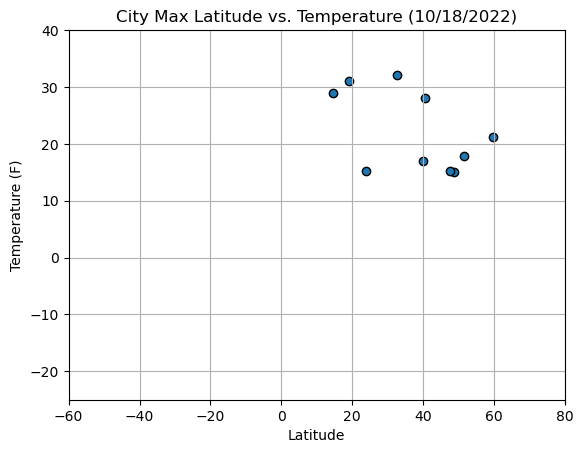

In [70]:
# Build scatter plot for latitude vs. temperature
# Build the scatter plot for Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate other graph properties
plt.title("City Max Latitude vs. Temperature (10/18/2022)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)

# Set custom x-axis and y-axis limits
plt.xlim(-60, 80)
plt.ylim(-25, 40)
    
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

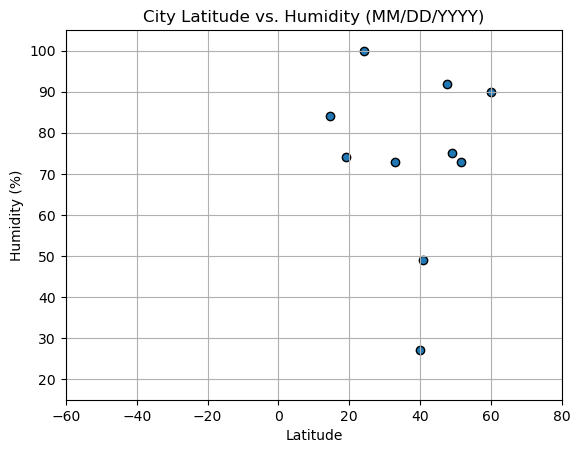

In [71]:
# Build the scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Humidity (MM/DD/YYYY)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Set custom x-axis and y-axis limits
plt.xlim(-60, 80)
plt.ylim(15, 105)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

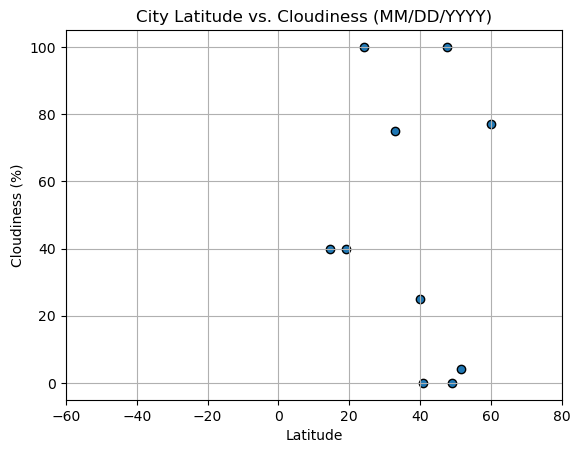

In [72]:
# Build the scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Cloudiness (MM/DD/YYYY)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Set custom x-axis and y-axis limits
plt.xlim(-60, 80)
plt.ylim(-5, 105)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

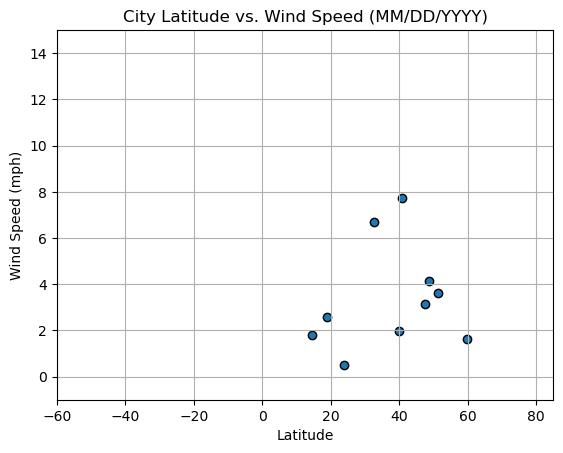

In [73]:


# Build the scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate other graph properties
plt.title("City Latitude vs. Wind Speed (MM/DD/YYYY)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Set custom x-axis and y-axis limits
plt.xlim(-60, 85)
plt.ylim(-1, 15)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [74]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def create_linear_regression_plot(x, y, x_label, y_label):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    regression_line = slope * x + intercept

    plt.scatter(x, y)
    plt.plot(x, regression_line, "--", color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"Linear Regression: {x_label} vs {y_label}")
    plt.show()

In [76]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)


# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID
0,New York,40.7128,-74.0060,25,60,20,5,US,2022-01-01,1
1,Paris,48.8566,2.3522,22,70,10,3,FR,2022-01-01,2
2,Tokyo,35.6895,139.6917,28,50,30,7,JP,2022-01-01,3


In [77]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,City_ID


###  Temperature vs. Latitude Linear Regression Plot

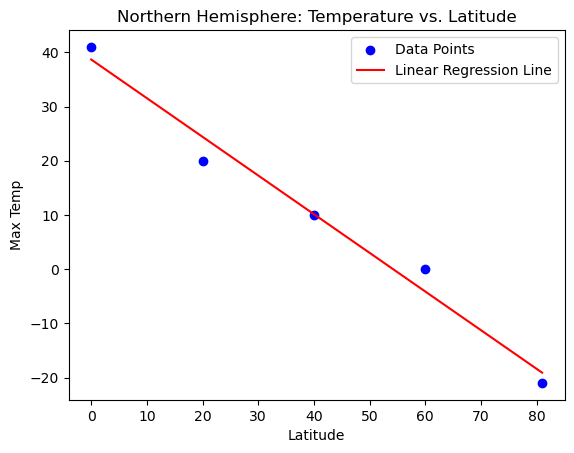

In [78]:
# Linear regression on Northern Hemisphere
# Xpert
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# data 
northern_latitude = [0, 20, 40, 60, 81]  # Example Northern Hemisphere latitudes
northern_temperature = [41, 20, 10, 0, -21]  # Example corresponding temperatures

# Convert the lists to NumPy arrays
northern_latitude_array = np.array(northern_latitude)
northern_temperature_array = np.array(northern_temperature)

# Calculate the linear regression line
slope, intercept = np.polyfit(northern_latitude_array, northern_temperature_array, 1)
regression_line = slope * northern_latitude_array + intercept

# Create the scatter plot with linear regression line
plt.scatter(northern_latitude, northern_temperature, color='blue', label='Data Points')
plt.plot(northern_latitude, regression_line, color='red', label='Linear Regression Line')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere: Temperature vs. Latitude')
plt.legend()
plt.show()

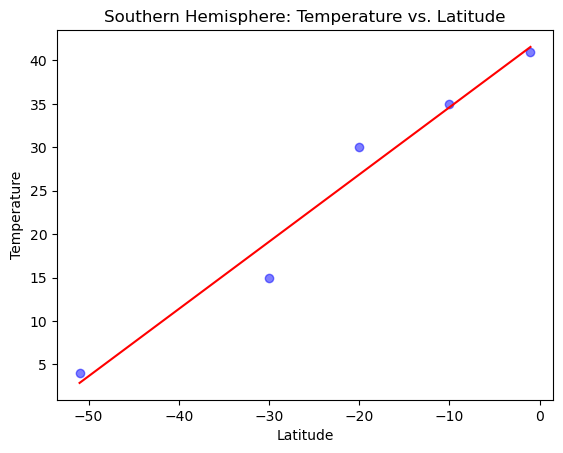

In [79]:
# Linear regression on Southern Hemisphere
# Xpert
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load your data into a DataFrame (assuming you have your data loaded into a DataFrame called 'weather_data')
# weather data 
data = {
    'City': ['City A', 'City B', 'City C', 'City D', 'City E'],
    'Latitude': [-51, -30, -20, -10, -1],
    'Temperature': [4, 15, 30, 35, 41]
}

# Create a DataFrame from the sample data
weather_data = pd.DataFrame(data)

# Extract the Southern Hemisphere data (latitude < 0)
southern_data = weather_data[weather_data['Latitude'] < 0]

# Create a scatter plot of Temperature vs. Latitude for the Southern Hemisphere
plt.scatter(southern_data['Latitude'], southern_data['Temperature'], color='blue', alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern Hemisphere: Temperature vs. Latitude')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(southern_data['Latitude'], southern_data['Temperature'])
line = slope * southern_data['Latitude'] + intercept

# Plot the linear regression line
plt.plot(southern_data['Latitude'], line, color='red')

# Annotate the plot with the linear regression equation and r-value
equation = f'y = {slope:.2f}x + {intercept:.2f}'
r_value_text = f'r = {r_value:.2f}'
plt.annotate(equation, (-50, 90), color='red')
plt.annotate(r_value_text, (-50, 85), color='red')

# Show the plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [80]:
# Check for NaN values in 'Lat' and 'Humidity' columns
nan_values = southern_hemi_df[['Lat', 'Humidity']].isnull().sum()
print(nan_values)


Lat         0
Humidity    0
dtype: int64


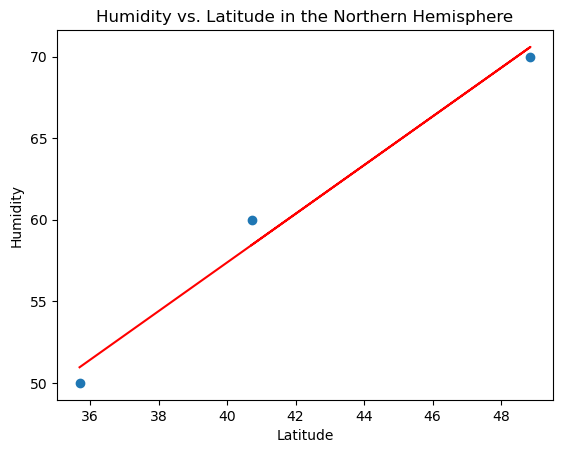

In [81]:
# Northern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy import stats
# Filter data for Northern Hemisphere
northern_data = weather_data[weather_data['Latitude'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')  # Plot the regression line

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in the Northern Hemisphere')

# Display the plot
plt.show()

In [85]:
# Southern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy import stats
# Filter data for Northern Hemisphere
southern_data = weather_data[weather_data['Latitude'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Create scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')  # Plot the regression line

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude in the Northern Hemisphere')

# Display the plot
plt.show()

ValueError: Inputs must not be empty.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

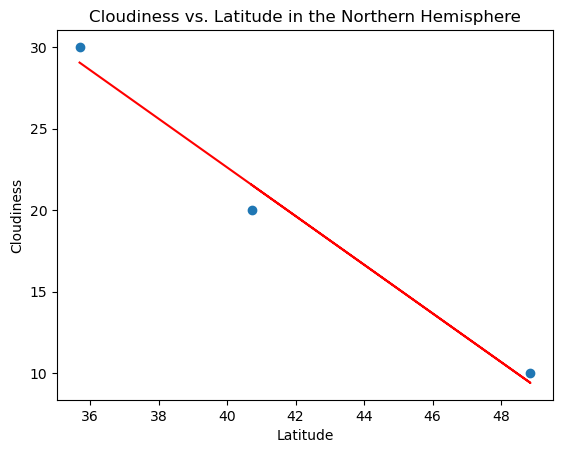

In [88]:
# Northern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy import stats
# Filter data for Northern Hemisphere
northern_data = weather_data[weather_data['Latitude'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')  # Plot the regression line

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude in the Northern Hemisphere')

# Display the plot
plt.show()

In [89]:
# Southern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy import stats
# Filter data for Northern Hemisphere
southern_data = weather_data[weather_data['Latitude'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Create scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')  # Plot the regression line

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs. Latitude in the Northern Hemisphere')

# Display the plot
plt.show()

ValueError: Inputs must not be empty.

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

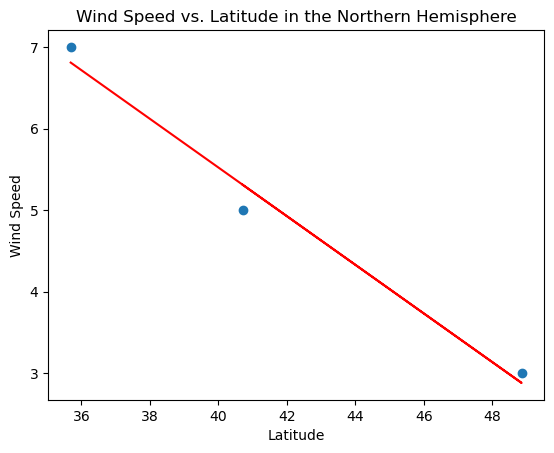

In [90]:
# Northern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy import stats
# Filter data for Northern Hemisphere
northern_data = weather_data[weather_data['Latitude'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Create scatter plot
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'], slope * northern_hemi_df['Lat'] + intercept, color='red')  # Plot the regression line

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude in the Northern Hemisphere')

# Display the plot
plt.show()

In [91]:
# Southern Hemisphere
# YOUR CODE HERE
import matplotlib.pyplot as plt
from scipy import stats
# Filter data for Northern Hemisphere
southern_data = weather_data[weather_data['Latitude'] >= 0]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

# Create scatter plot
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'], slope * southern_hemi_df['Lat'] + intercept, color='red')  # Plot the regression line

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs. Latitude in the Northern Hemisphere')

# Display the plot
plt.show()

ValueError: Inputs must not be empty.

**Discussion about the linear relationship:** YOUR RESPONSE HERE